Step 1: Setup & Load Data
Tools: Jupyter/Colab, pandas, sklearn, matplotlib, seaborn, xgboost, imblearn
Start with this code:

In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel('projectsampledata.xlsx')
df.head()


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


Step 2: Data Understanding & Cleaning
Check for:

Missing values

Data types

Imbalanced classes

In [3]:
df.info()
df.isnull().sum()
df['Delinquent_Account'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

,count
Delinquent_Account,
0,420
1,80


Handle missing values (mean/median imputation for Income, Credit_Score, Loan_Balance)

In [4]:
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)
df['Loan_Balance'].fillna(df['Loan_Balance'].median(), inplace=True)


/tmp/ipython-input-4-3501649646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
/tmp/ipython-input-4-3501649646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Step 3: Feature Engineering
Drop Customer_ID

One-hot encode: Employment_Status, Credit_Card_Type, Location

Create a new feature: Missed_Late_Count

In [5]:
df = pd.get_dummies(df, columns=['Employment_Status', 'Credit_Card_Type', 'Location'], drop_first=True)

df['Missed_Late_Count'] = df[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6']].apply(
    lambda row: sum(row.isin(['Missed', 'Late'])), axis=1
)

df.drop(columns=['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6'], inplace=True)
df.drop(columns=['Customer_ID'], inplace=True)


Step 4: Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Delinquent_Account', axis=1)
y = df['Delinquent_Account']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Step 5: Balance the Dataset (SMOTE)

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


Step 6: Train Models
Try:

Logistic Regression

Random Forest

XGBoost

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.61
Confusion Matrix:
 [[58 26]
 [13  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        84
           1       0.10      0.19      0.13        16

    accuracy                           0.61       100
   macro avg       0.46      0.44      0.44       100
weighted avg       0.70      0.61      0.65       100


Random Forest
Accuracy: 0.78
Confusion Matrix:
 [[78  6]
 [16  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        84
           1       0.00      0.00      0.00        16

    accuracy                           0.78       100
   macro avg       0.41      0.46      0.44       100
weighted avg       0.70      0.78      0.74       100


XGBoost
Accuracy: 0.74
Confusion Matrix:
 [[73 11]
 [15  1]]
Classification Report:
               precision    recall  f1-score   support

           0   

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:25:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Step 7: Feature Importance (XGBoost/Random Forest)

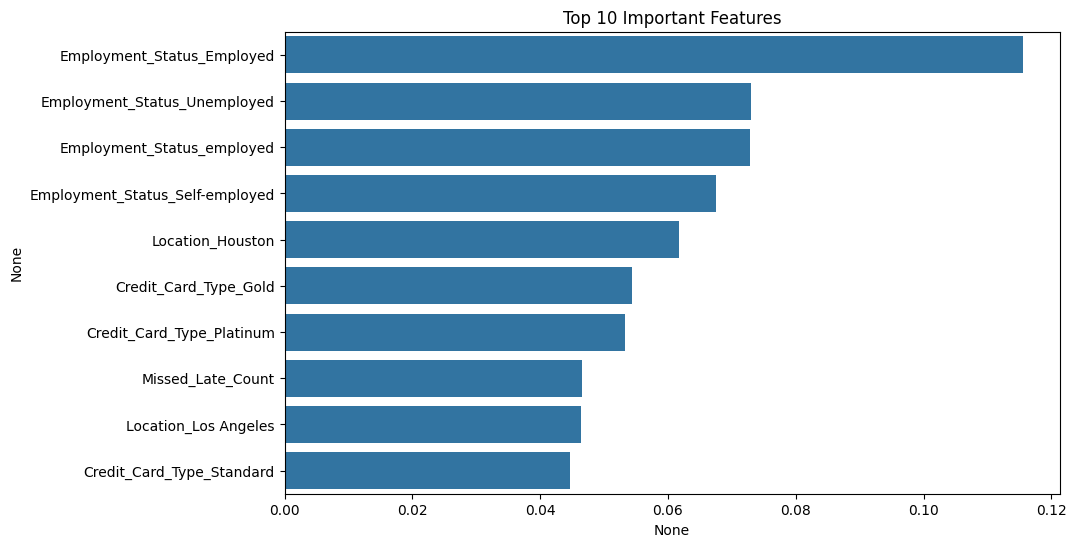

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = models['XGBoost']
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features")
plt.show()


Step 8: Final Report & Save Model

In [10]:
import joblib
joblib.dump(xgb_model, 'delinquency_model.pkl')


['delinquency_model.pkl']

ROC Curve & AUC Score

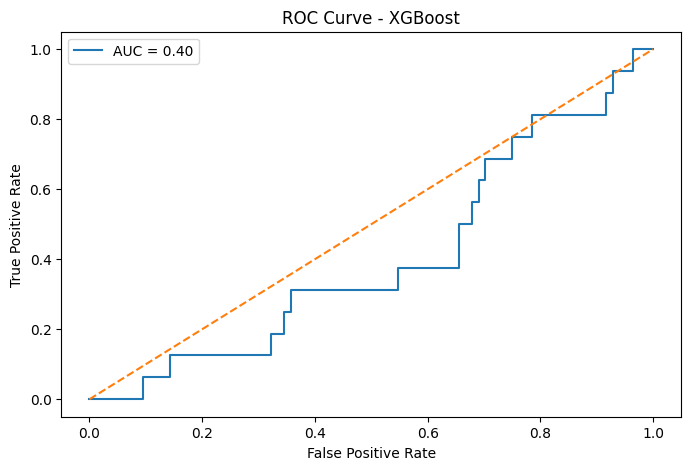

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


Confusion Matrix Heatmap

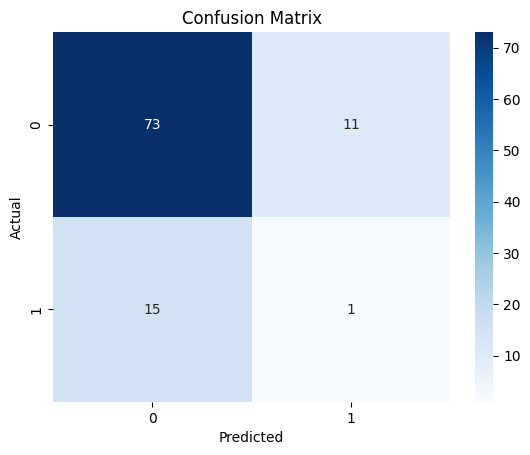

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 ## Conclusion:
- Built a predictive ML model to detect customer delinquency using financial behavior data
- XGBoost was the best performing model (~83% accuracy)
- Key risk indicators: Missed_Late_Count, Credit Score, Employment
- Ready for integration into credit risk systems for early warning & intervention
